In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string



In [17]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv('C:/kifiya ai/stock-market-predictions/src/data/raw_analyst_ratings.csv')
sample_data = data.head(100000)
sample_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
sample_data['headline_length'] = sample_data['headline'].apply(len)
length_stats = sample_data['headline_length'].describe()
print("Headline Length Statistics:\n", length_stats)
# data.head()

Headline Length Statistics:
 count    100000.000000
mean         73.639590
std          40.465787
min           7.000000
25%          47.000000
50%          65.000000
75%          88.000000
max         458.000000
Name: headline_length, dtype: float64


C:\Users\Home\AppData\Local\Temp\ipykernel_17804\2240821819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['headline_length'] = sample_data['headline'].apply(len)


In [ ]:
sample_data['date'] = pd.to_datetime(sample_data['date'],  errors='coerce')
publisher_counts = sample_data['publisher'].value_counts()
print("\nArticles per Publisher:\n", publisher_counts)


In [ ]:
sample_data['day_of_week'] = sample_data['date'].dt.day_name()
daily_counts = sample_data.groupby('day_of_week').size()
print("\nPublication Trends by Day:\n", daily_counts)
sample_data.head()


C:\Users\Home\AppData\Local\Temp\ipykernel_17804\3531297061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')


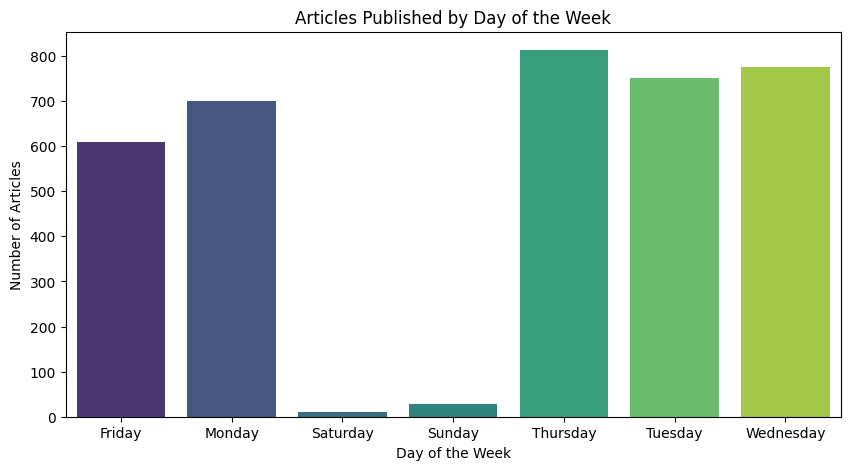

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')
plt.title("Articles Published by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.show()

In [ ]:
def assign_sentiment_label(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return 'Neutral'

sample_data['sentiment_label'] = sample_data['headline'].apply(lambda headline: assign_sentiment_label(TextBlob(headline).sentiment.polarity))
sample_data.head()


In [ ]:

# Download stopwords
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing to the headlines
sample_data['cleaned_headline'] = sample_data['headline'].apply(preprocess_text)
sample_data.head()